In [1]:
from typing import Union
import numpy as np
import pandas as pd
import numpy.typing as npt
from typing import Tuple
from tqdm import tqdm
from matplotlib import pyplot as plt
from simulations.stochastic_models import StochasticModels

from utility.math_equations import (
    compute_currrent_step_log_price,
    compute_next_step_log_vol,
)

from filters.kalman_filter import LinearKalmanFilterND

In [2]:
# Seed for reproducibility
np.random.seed(42)


t, prices = StochasticModels.simulate_random_walk_process(2, 100)

df = pd.DataFrame({"t": t, "prices": prices})
df["returns"] = df.prices.pct_change().fillna(0)
df["vol"] = df.returns.rolling(30).std()
df = df.dropna()
df

,t,prices,returns,vol
29,0.115079,88.711186,-0.006533,0.017788
30,0.119048,87.507773,-0.013566,0.017851
31,0.123016,91.212329,0.042334,0.019804
32,0.126984,91.185335,-0.000296,0.019583
33,0.130952,89.069913,-0.023199,0.018844
...,...,...,...,...
500,1.984127,108.690350,0.017338,0.023133
501,1.988095,112.509183,0.035135,0.022478
502,1.992063,109.712048,-0.024861,0.022269
503,1.996032,110.837986,0.010263,0.021849


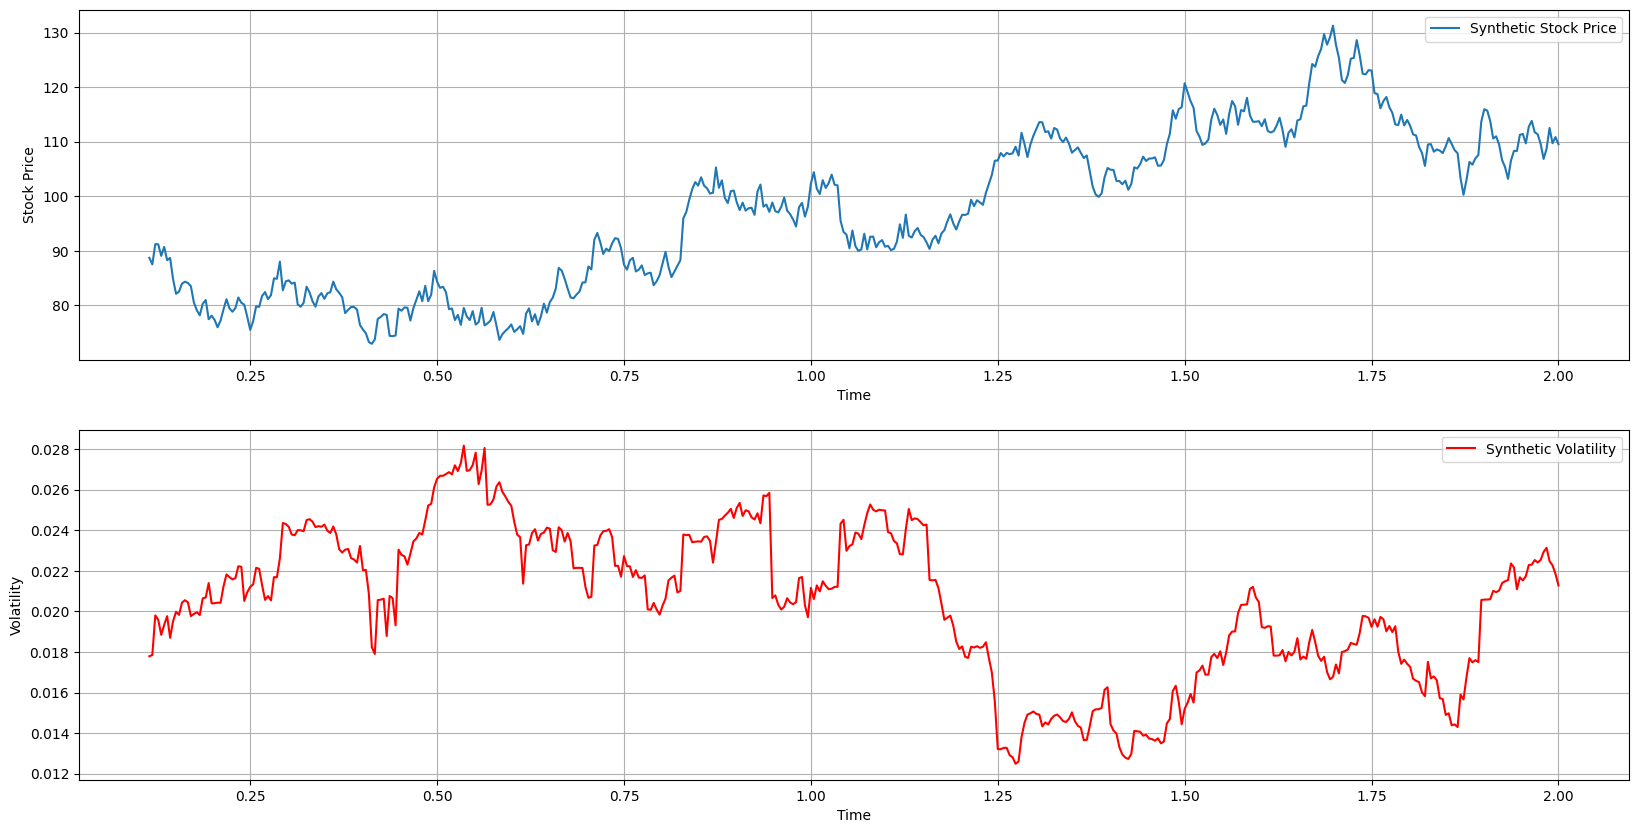

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(df.t, df.prices, label="Synthetic Stock Price")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Stock Price")
ax[0].legend()
ax[0].grid()

ax[1].plot(df.t, df.vol, color="red", label="Synthetic Volatility")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Volatility")
ax[1].legend()
ax[1].grid()

In [4]:
LEARNABLE_PARAMS = [0.2, 0.02, 0.03, -0.3, 0.07, 0.5]

In [5]:

kf_matriciel = LinearKalmanFilterND(
    F=np.array([[1.0]]),
    H=np.array([[1.0]]),
    Q=np.array([[0.5]]),
    R=np.array([[0.5]]),
)

x_hat, P_var, y_hat, V_var = kf_matriciel.fit_predict(
    df.prices.to_numpy().reshape(-1, 1), verbose=False
)

Kalman Filter Progress: 100%|██████████| 475/475 [00:00<00:00, 3680.21it/s]


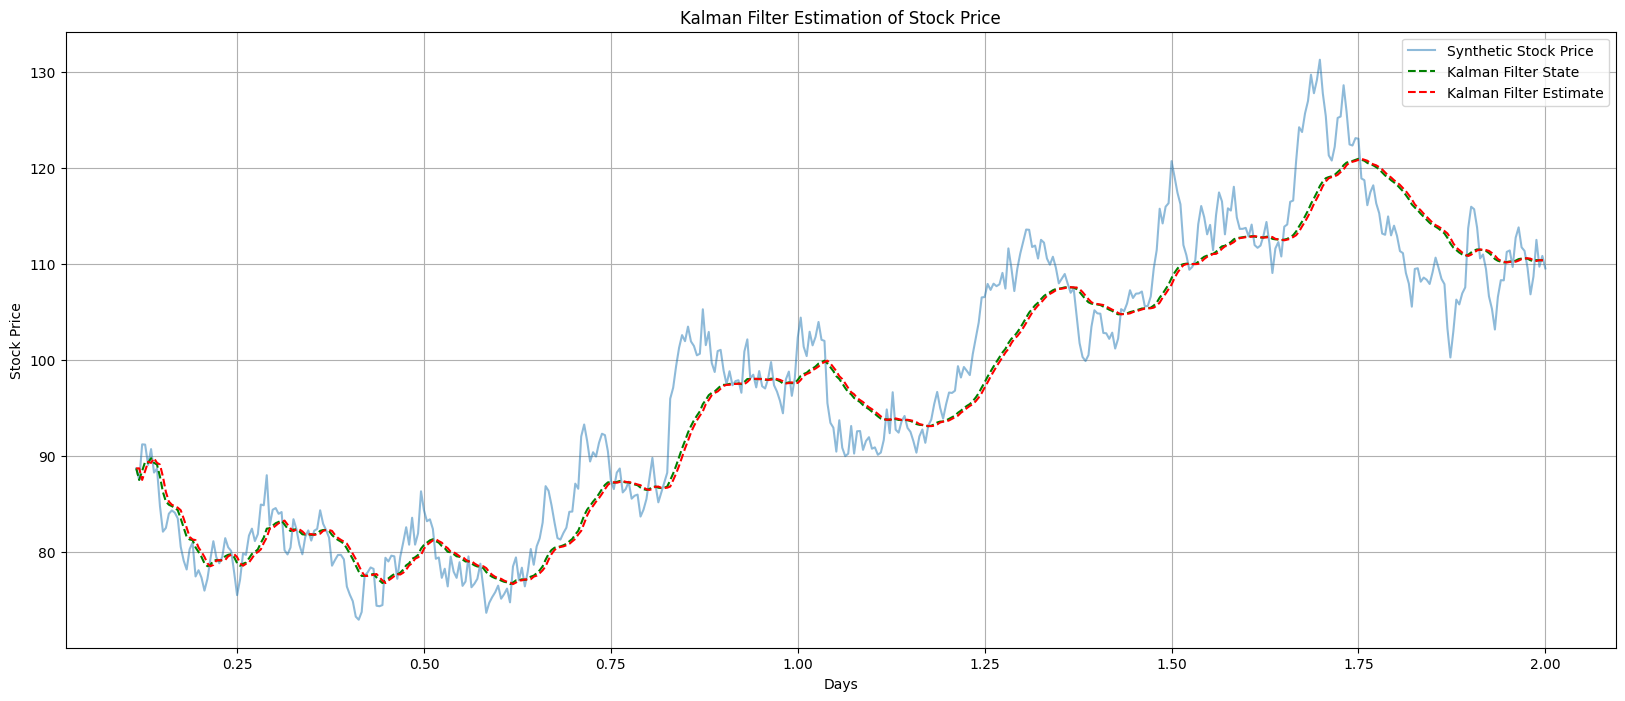

In [6]:
# Plot the results
plt.figure(figsize=(20, 8))
plt.plot(df.t, df.prices, label="Synthetic Stock Price", alpha=0.5)
plt.plot(df.t, x_hat, label="Kalman Filter State", linestyle="--", color="green")
plt.plot(df.t, y_hat, label="Kalman Filter Estimate", linestyle="--", color="red")
plt.title("Kalman Filter Estimation of Stock Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [7]:

kf_matriciel = LinearKalmanFilterND(
    F=np.array([[1.0,0.0],[0.0,1.0]]),
    H=np.array([[1.0,0.0],[0.0,1.0]]),
    Q=np.array([[1.0,0.0],[0.0,1.0]]),
    R=np.array([[1.0,0.0],[0.0,1.0]]),
)

x_hat, P_var, y_hat, V_var = kf_matriciel.fit_predict(
    df[['prices','vol']].to_numpy(), verbose=False
)



Kalman Filter Progress: 100%|██████████| 475/475 [00:00<00:00, 1504.94it/s]


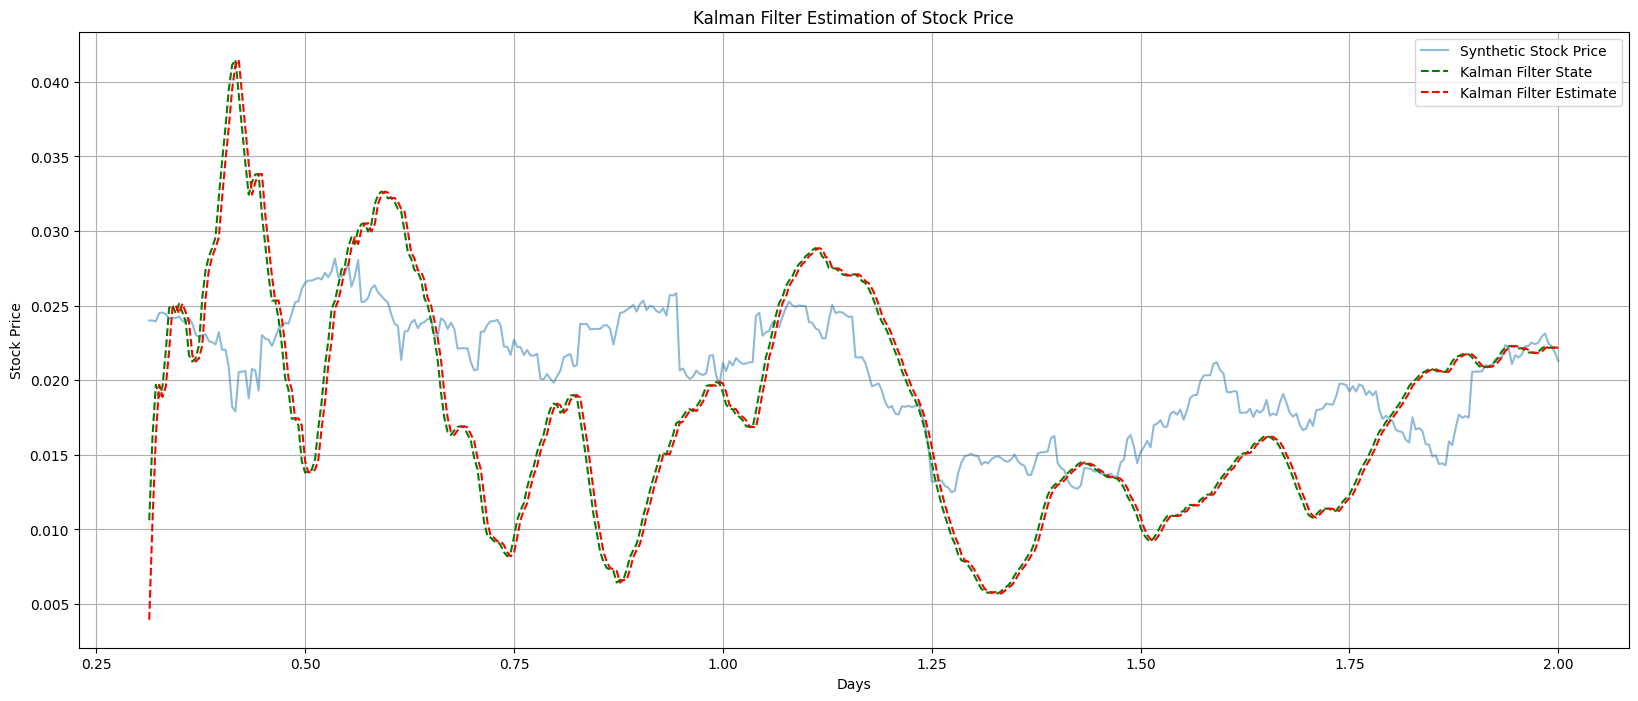

In [8]:
# Plot the results
plt.figure(figsize=(20, 8))
plt.plot(df.t[50:], df.vol[50:], label="Synthetic Stock Price", alpha=0.5)
plt.plot(df.t[50:], x_hat[50:,-1], label="Kalman Filter State", linestyle="--", color="green")
plt.plot(df.t[50:], y_hat[50:,-1], label="Kalman Filter Estimate", linestyle="--", color="red")
plt.title("Kalman Filter Estimation of Stock Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()